Student name: Connor Pate
Student pace: part time
Blog post URL: https://medium.com/@clpate2



Instructor name: Amber Yandow 




# The Problem with Mental Health in U.S. Policing

#### Analyzing Mental Health and Demographics using The Washington Post's Police Shooting database
[Washington Post Database, Github](https://github.com/washingtonpost/data-police-shootings)

## Directory
#### 1. Importing Necessary Libraries
#### 2. Importing Datasets, Merging, and Inspecting Data
#### 3. Cleaning and Converting Data
#### 4. Initial Analysis and EDA 
#### 5. Automated EDA
#### 6. Final Prep Stage for Modeling: Scaling Continuous Data, Creating Dummy DF and Test/Train Sets
#### 7. Random Forest Classifier Preliminary Analysis
#### 8. Random Forest Feature Analysis 
#### 9. Random Forest Classifier, SMOTE and Gridsearch
#### 10. Best Performing Model and Conclusion

### 1. Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
import imblearn
from imblearn.over_sampling import SMOTE

from ClfAutoEDA import *
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
from sklearn import svm
from scipy.stats import chisquare
import sys
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from numpy import mean
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import eli5
from eli5.sklearn import PermutationImportance

### 2. Importing Datasets, Merging, and Inspecting Data

###### Washington Post Dataset Tracking Police Shootings from 2015 to Present

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
df.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6032 non-null   int64  
 1   name                     5802 non-null   object 
 2   date                     6032 non-null   object 
 3   manner_of_death          6032 non-null   object 
 4   armed                    5822 non-null   object 
 5   age                      5756 non-null   float64
 6   gender                   6031 non-null   object 
 7   race                     5410 non-null   object 
 8   city                     6032 non-null   object 
 9   state                    6032 non-null   object 
 10  signs_of_mental_illness  6032 non-null   bool   
 11  threat_level             6032 non-null   object 
 12  flee                     5688 non-null   object 
 13  body_camera              6032 non-null   bool   
 14  longitude               

###### Importing State Classification Dataset to Minimize Classification Variables 

In [5]:
states = pd.read_csv('us census bureau regions and divisions.csv')
states.head()

State State Code Region            Division
0      Alaska         AK   West             Pacific
1     Alabama         AL  South  East South Central
2    Arkansas         AR  South  West South Central
3     Arizona         AZ   West            Mountain
4  California         CA   West             Pacific

In [6]:
#Dropping the 'State' column as the primary DF uses state codes 
states = states.drop(['State'], axis=1)

In [7]:
states = states.rename(columns={"State Code": "state"})

In [8]:
#Merging on shared 'state' column
data = pd.merge(states, df, on='state')
data.head()

state Region Division    id                   name        date  \
0    AK   West  Pacific   131  John Martin Whittaker  2015-02-08   
1    AK   West  Pacific   836           Tristan Vent  2015-09-08   
2    AK   West  Pacific   816      Vincent J. Perdue  2015-09-09   
3    AK   West  Pacific   953            Jon Ployhar  2015-10-24   
4    AK   West  Pacific  1166            Herman Bean  2016-01-12   

  manner_of_death         armed   age gender race             city  \
0            shot           gun  33.0      M    W        Anchorage   
1            shot           gun  19.0      M    N        Fairbanks   
2            shot           gun  33.0      M    N        Fairbanks   
3            shot  undetermined  49.0      M    W  Kenai Peninsula   
4            shot         knife  49.0      M    N          Spenard   

   signs_of_mental_illness threat_level         flee  body_camera  longitude  \
0                    False       attack          Car        False   -149.859   
1                    False       attack  Not fleeing        False   -147.779   
2                    False       attack          Car        False   -147.543   
3                    False       attack  Not fleeing        False   -151.283   
4                     True        other  Not fleeing        False   -149.898   

   latitude  is_geocoding_exact  
0    61.208                True  
1    64.827                True  
2    64.806                True  
3    60.287                True  
4    61.192                True

### 3. Cleaning and Converting Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6032 entries, 0 to 6031
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    6032 non-null   object 
 1   Region                   6032 non-null   object 
 2   Division                 6032 non-null   object 
 3   id                       6032 non-null   int64  
 4   name                     5802 non-null   object 
 5   date                     6032 non-null   object 
 6   manner_of_death          6032 non-null   object 
 7   armed                    5822 non-null   object 
 8   age                      5756 non-null   float64
 9   gender                   6031 non-null   object 
 10  race                     5410 non-null   object 
 11  city                     6032 non-null   object 
 12  signs_of_mental_illness  6032 non-null   bool   
 13  threat_level             6032 non-null   object 
 14  flee                    

###### Dropping unused columns and inaccurate values

In [10]:
#Dropping unused columns and geocoding values that are inaccurate
data = data.drop(['name', 'id'], axis=1)
data = data[data.is_geocoding_exact != 'False']

###### Transforming Boolean values

In [11]:
data = data.applymap(lambda x: 1 if x == True else x)
data = data.applymap(lambda x: 0 if x == False else x)

###### Checking for missing values

In [12]:
data.isna().sum()

state                        0
Region                       0
Division                     0
date                         0
manner_of_death              0
armed                      210
age                        276
gender                       1
race                       622
city                         0
signs_of_mental_illness      0
threat_level                 0
flee                       344
body_camera                  0
longitude                  294
latitude                   294
is_geocoding_exact           0
dtype: int64

###### Dropping nan values and filling others 

In [13]:
data = data.dropna(subset=['age', 'longitude', 'latitude', 'flee'])

In [14]:
#Converting 'race' and 'armed' missing values into usable data
values = {'race': 'U', 'armed': 'undetermined'}
data = data.fillna(value=values)

In [15]:
#Double checking missing/null values
data.isna().sum()

state                      0
Region                     0
Division                   0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [16]:
display(data.describe())

age  signs_of_mental_illness  body_camera    longitude  \
count  5175.000000              5175.000000  5175.000000  5175.000000   
mean     37.035556                 0.240386     0.129469   -97.062366   
std      13.026017                 0.427359     0.335750    16.641622   
min       6.000000                 0.000000     0.000000  -158.137000   
25%      27.000000                 0.000000     0.000000  -112.077000   
50%      35.000000                 0.000000     0.000000   -94.062000   
75%      46.000000                 0.000000     0.000000   -82.999000   
max      91.000000                 1.000000     1.000000   -68.014000   

          latitude  is_geocoding_exact  
count  5175.000000         5175.000000  
mean     36.710826            0.998454  
std       5.360495            0.039291  
min      19.498000            0.000000  
25%      33.492500            1.000000  
50%      36.159000            1.000000  
75%      39.998500            1.000000  
max      71.301000            1.000000

### 4. EDA 

###### Taking a deeper look at unique values

In [17]:
data['signs_of_mental_illness'].value_counts()

0    3931
1    1244
Name: signs_of_mental_illness, dtype: int64

In [18]:
#Examining values of the 'armed' variable 
data['armed'].value_counts()

gun                2941
knife               759
unarmed             355
undetermined        298
toy weapon          186
                   ... 
barstool              1
metal rake            1
bow and arrow         1
walking stick         1
air conditioner       1
Name: armed, Length: 93, dtype: int64

###### Examining 'armed' values prior to conversion

In [19]:
pie_me = data['armed'].value_counts().reset_index()
pie_me.columns = ['armed', 'count']

fig = px.pie(
    pie_me, 
    values='count', 
    names='armed',  
    title='Weapon distribution', 
    width=600, 
    height=600
)

fig.show()

###### Converting 'armed' variable and inspecting new counts

In [20]:
#converting armed values with a count of less than 59 into 'other'
data[['armed']] = data[['armed']].where(data.apply(lambda x: x.groupby(x).transform('count')>59), 'other')

In [21]:
data['armed'].value_counts()

gun               2941
knife              759
other              408
unarmed            355
undetermined       298
toy weapon         186
vehicle            164
unknown weapon      64
Name: armed, dtype: int64

In [22]:
pie_me = data['armed'].value_counts().reset_index()
pie_me.columns = ['armed', 'count']

fig = px.pie(
    pie_me, 
    values='count', 
    names='armed',  
    title='Weapon distribution', 
    width=600, 
    height=600
)

fig.show()

#### Signs of Mental Illness Deep Dive

###### Inspecting different features and counts for 'armed' and mental illness

Text(0.5, 0.98, 'Mental Illness Distribution')

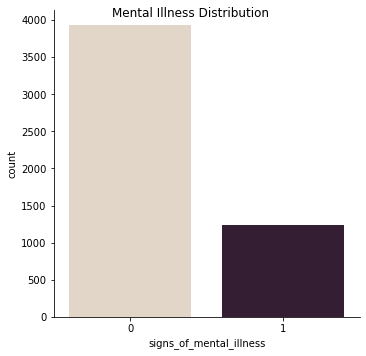

In [23]:
ax = sns.catplot(x="signs_of_mental_illness", kind="count", palette="ch:.25", data=data)
ax.fig.suptitle('Mental Illness Distribution')

In [24]:
#Checking weapon distribution
pd.crosstab(data.armed, data.signs_of_mental_illness, normalize='index')

signs_of_mental_illness         0         1
armed                                      
gun                      0.789867  0.210133
knife                    0.628458  0.371542
other                    0.634804  0.365196
toy weapon               0.564516  0.435484
unarmed                  0.808451  0.191549
undetermined             0.916107  0.083893
unknown weapon           0.812500  0.187500
vehicle                  0.945122  0.054878

Text(0.5, 0.98, 'Mental Illness Distribution with Armed Type')

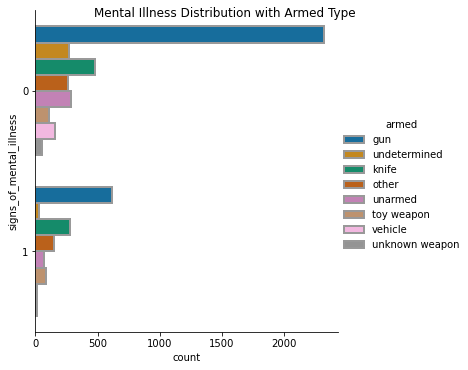

In [25]:
#Plotting out weapon distribution
ax = sns.catplot(y="signs_of_mental_illness", hue="armed", kind="count",
            palette="colorblind", edgecolor=".6",
            data=data, linewidth=2)
ax.fig.suptitle('Mental Illness Distribution with Armed Type')

###### Analyzing race and mental illness

In [26]:
#Checking race distribution 
pd.crosstab(data.race, data.signs_of_mental_illness, normalize='index')

signs_of_mental_illness         0         1
race                                       
A                        0.737500  0.262500
B                        0.839813  0.160187
H                        0.814480  0.185520
N                        0.797101  0.202899
O                        0.777778  0.222222
U                        0.748677  0.251323
W                        0.698315  0.301685

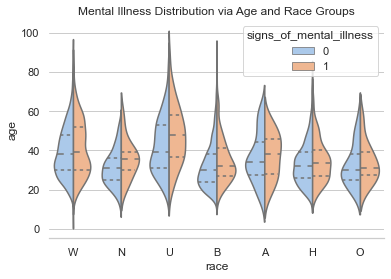

In [27]:

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="race", y="age",  hue="signs_of_mental_illness",
               split=True, inner="quart",
               data=data).set_title('Mental Illness Distribution via Age and Race Groups')
sns.despine(left=True)


##### Each ethnicity has its own distribution among age groups.  'W' (White, non-Hispanic) and 'A' (Asian) outpace other ethnicities by several precentage points. 'W,' in particular, makes up for almost a third of the positive mental illness stats, peaking in the 30s and remaining present until the mid 70s. 

###### Analyzing race, gender and mental illness

In [28]:
#Checking gender disparity
pd.crosstab(data.gender, data.signs_of_mental_illness, normalize='index')

signs_of_mental_illness         0         1
gender                                     
F                        0.651452  0.348548
M                        0.764897  0.235103

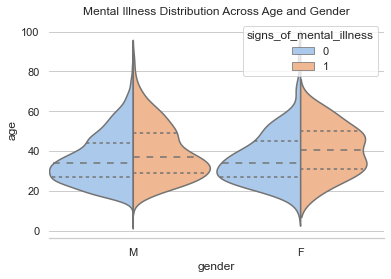

In [29]:

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="gender", y="age",  hue="signs_of_mental_illness",
               split=True, inner="quart",
               data=data, width=1).set_title('Mental Illness Distribution Across Age and Gender')
sns.despine(left=True)

##### Nearly a third of women fatally shot by police display signs of mental illness. Unlike men, this trend stays consistent regardless of age. 

Text(0.5, 0.98, 'Mental Illness Distribution Sorted by Gender and Race')

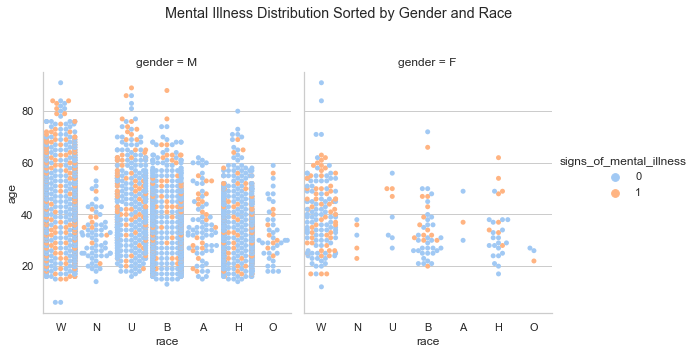

In [30]:
#Checking gender disparity with race
ax = sns.catplot(x="race", y="age", hue="signs_of_mental_illness",
            col="gender", aspect=.8,
            kind="swarm", data=data)
plt.subplots_adjust(top=.8)
ax.fig.suptitle('Mental Illness Distribution Sorted by Gender and Race')

Text(0.5, 0.98, 'Mental Illness Distribution Across Regions and Genders')

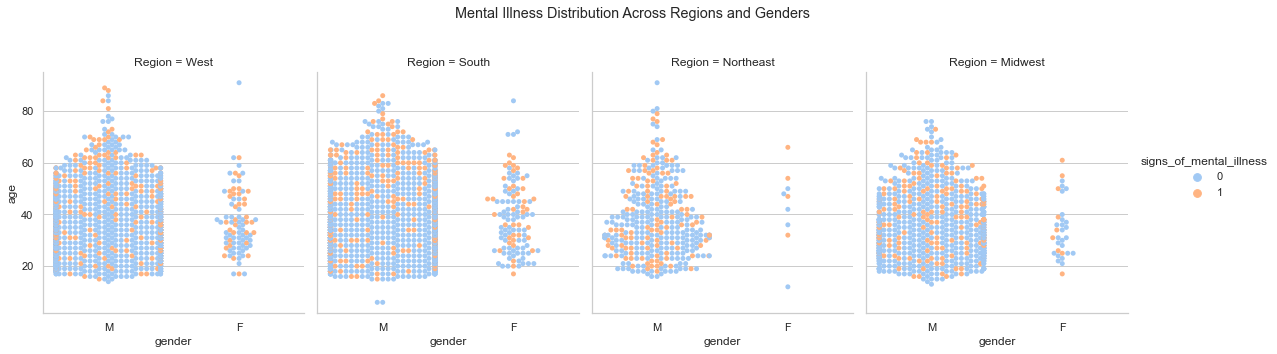

In [31]:
#Checking gender disparity while examining region
ax = sns.catplot(x="gender", y="age", hue="signs_of_mental_illness",
            col="Region", aspect=.8,
            kind="swarm", data=data)
plt.subplots_adjust(top=0.8)
ax.fig.suptitle('Mental Illness Distribution Across Regions and Genders')

Text(0.5, 0.98, 'Mental Illness Distribution Sorted by Gender and Race')

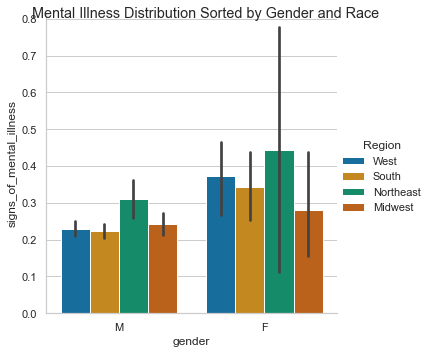

In [32]:
#Keep Northeast in context with available information
ax = sns.catplot(x="gender", y="signs_of_mental_illness", hue="Region", kind="bar", data=data, palette='colorblind')
ax.fig.suptitle('Mental Illness Distribution Sorted by Gender and Race')

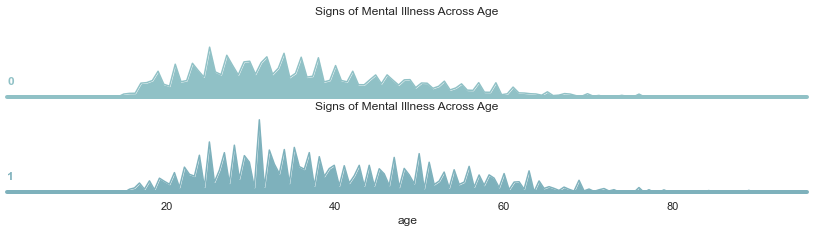

In [33]:

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="signs_of_mental_illness", hue="signs_of_mental_illness", 
                  aspect=7, height=1.7, palette=pal)


g.map(sns.kdeplot, "age", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(plt.axhline, y=0, lw=4, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "age")


g.fig.subplots_adjust(hspace=.25)


g.set_titles("Signs of Mental Illness Across Age")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [34]:
#Checking Division distribution
pd.crosstab(data.Division, data.signs_of_mental_illness, normalize='index')

signs_of_mental_illness         0         1
Division                                   
East North Central       0.744275  0.255725
East South Central       0.812987  0.187013
Middle Atlantic          0.685606  0.314394
Mountain                 0.798440  0.201560
New England              0.684211  0.315789
Pacific                  0.737143  0.262857
South Atlantic           0.745545  0.254455
West North Central       0.777070  0.222930
West South Central       0.781414  0.218586

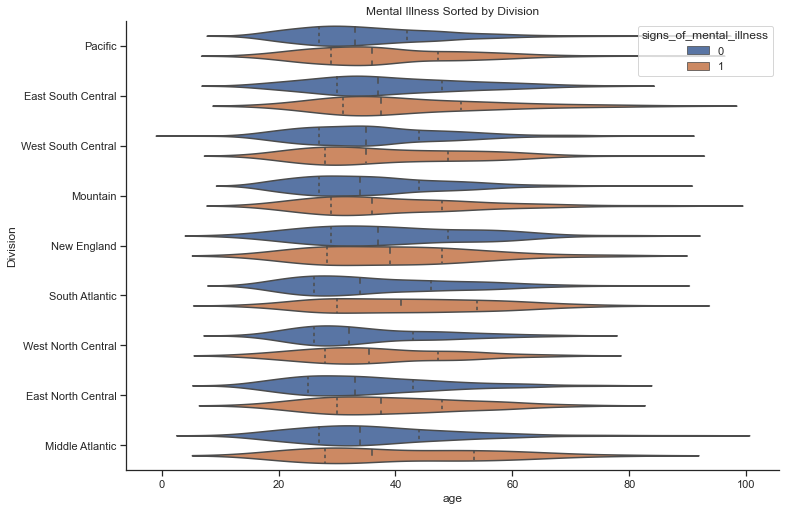

In [35]:
# plotting Division distribution
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="age", y="Division", hue="signs_of_mental_illness",
            kind="violin", data=data, inner="quart", ax=ax).set_title('Mental Illness Sorted by Division')    
sns.despine()


##### Lacking uniform distribution, each age group in each Division requires independent analysis. 

Text(0.5, 0.98, 'Mental Illness Sorted by Gender and Response (Flee)')

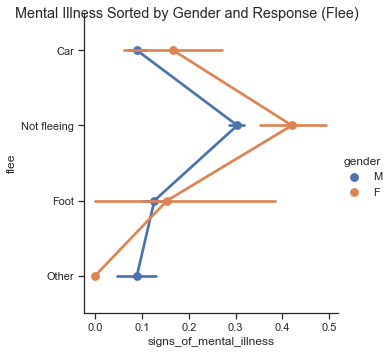

In [36]:
ax = sns.catplot(x="signs_of_mental_illness", y="flee", hue="gender", kind="point", data=data)
ax.fig.suptitle('Mental Illness Sorted by Gender and Response (Flee)')

##### Investigating 'threat level'

Text(0.5, 0.98, 'Spread of Casualties with MI Sorted by Threat Level')

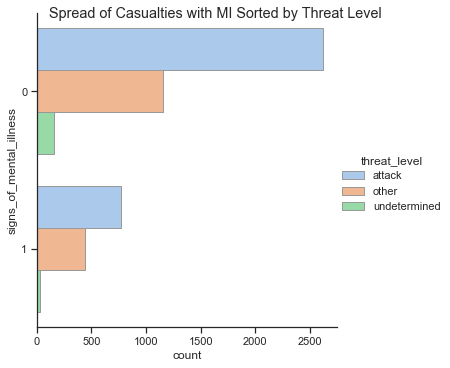

In [37]:
ax = sns.catplot(y="signs_of_mental_illness", hue="threat_level", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
ax.fig.suptitle('Spread of Casualties with MI Sorted by Threat Level')

Text(0.5, 1.0, 'An Examination of Threat Level, Age, and MI Signs')

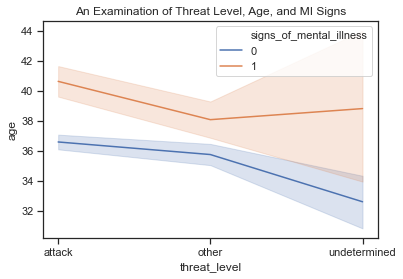

In [38]:
sns.lineplot(x='threat_level', y='age', data=data, hue='signs_of_mental_illness').set_title('An Examination of Threat Level, Age, and MI Signs')


### 5. Automated EDA 

The data looks like this: 
   state Region Division        date manner_of_death         armed   age  \
0    AK   West  Pacific  2015-02-08            shot           gun  33.0   
1    AK   West  Pacific  2015-09-08            shot           gun  19.0   
2    AK   West  Pacific  2015-09-09            shot           gun  33.0   
3    AK   West  Pacific  2015-10-24            shot  undetermined  49.0   
4    AK   West  Pacific  2016-01-12            shot         knife  49.0   

  gender race             city  signs_of_mental_illness threat_level  \
0      M    W        Anchorage                        0       attack   
1      M    N        Fairbanks                        0       attack   
2      M    N        Fairbanks                        0       attack   
3      M    W  Kenai Peninsula                        0       attack   
4      M    N          Spenard                        1        other   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0          Car   

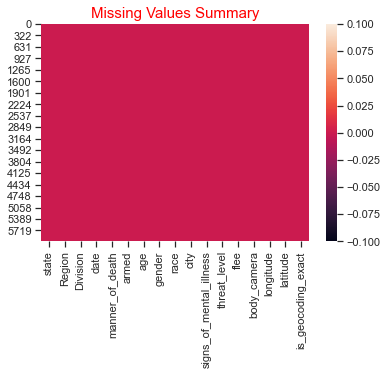

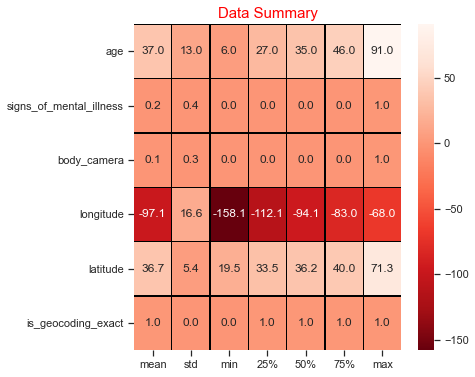

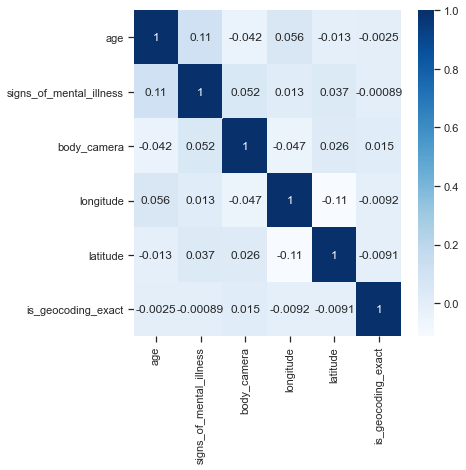

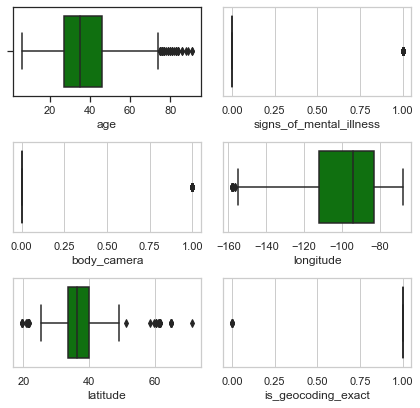

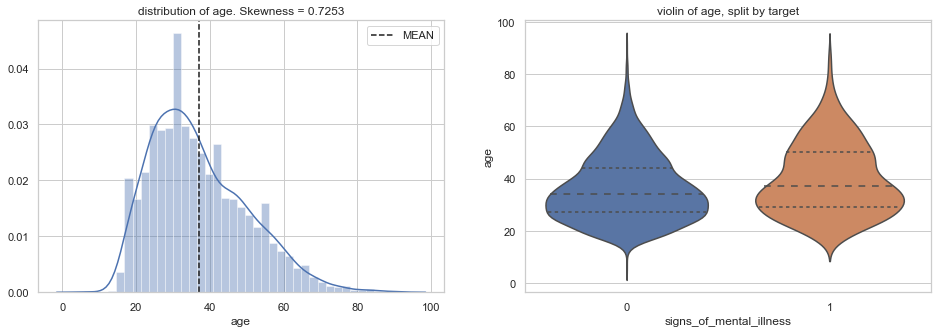

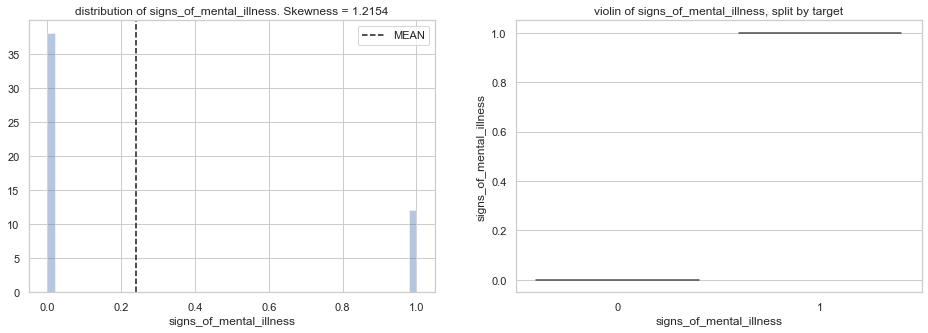

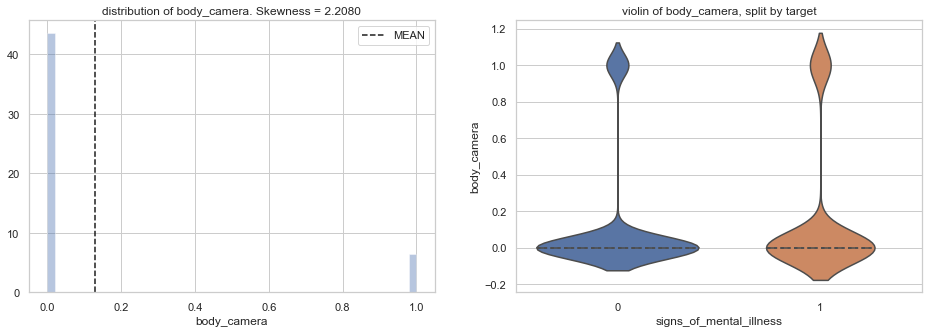

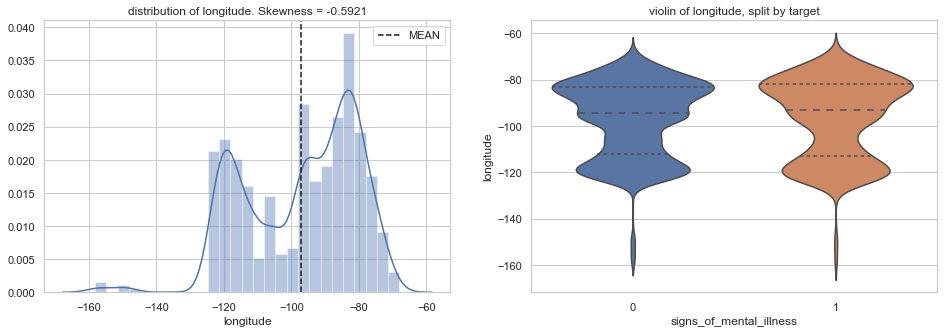

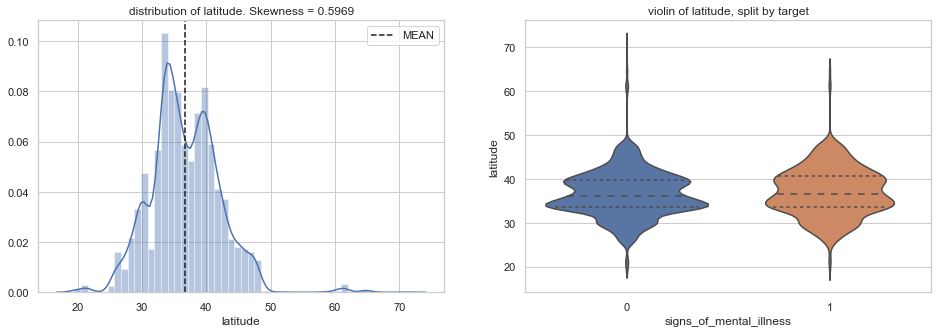

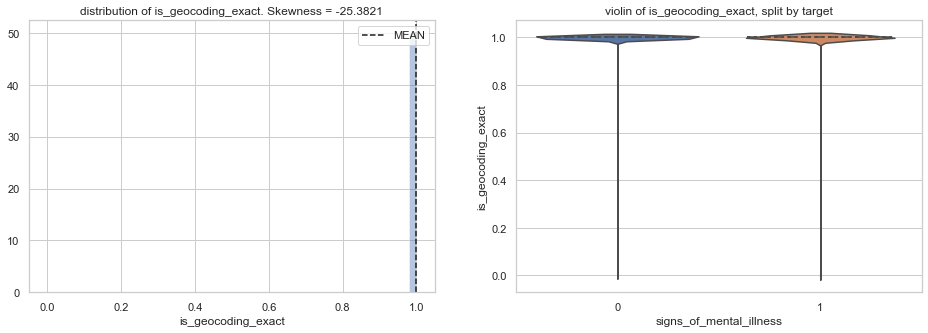

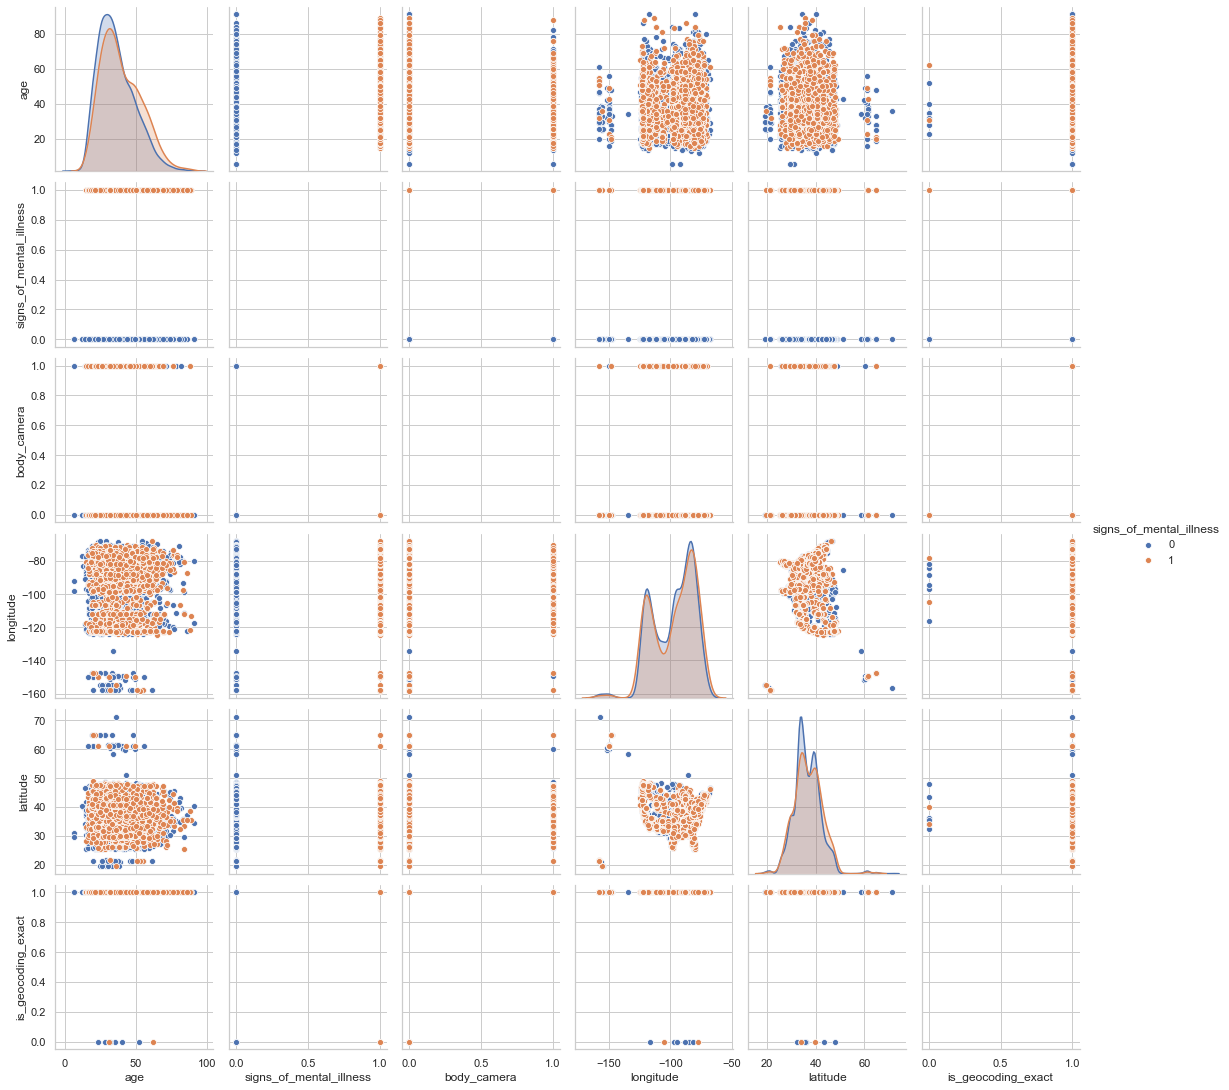

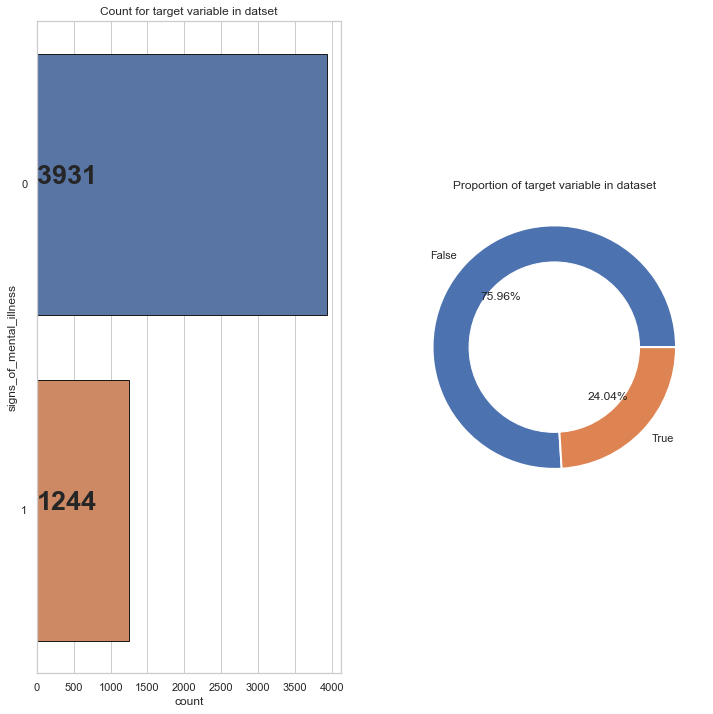

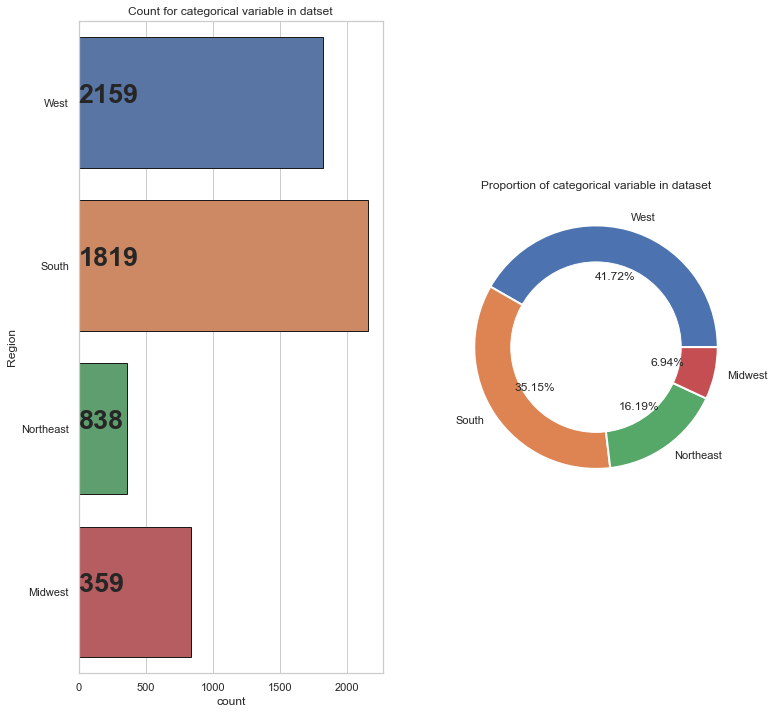

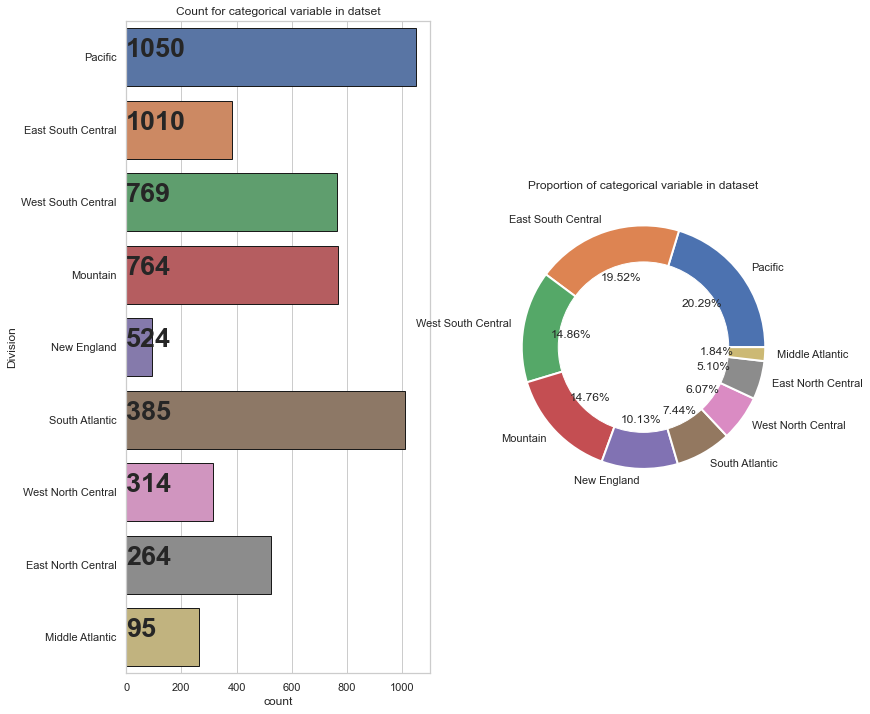

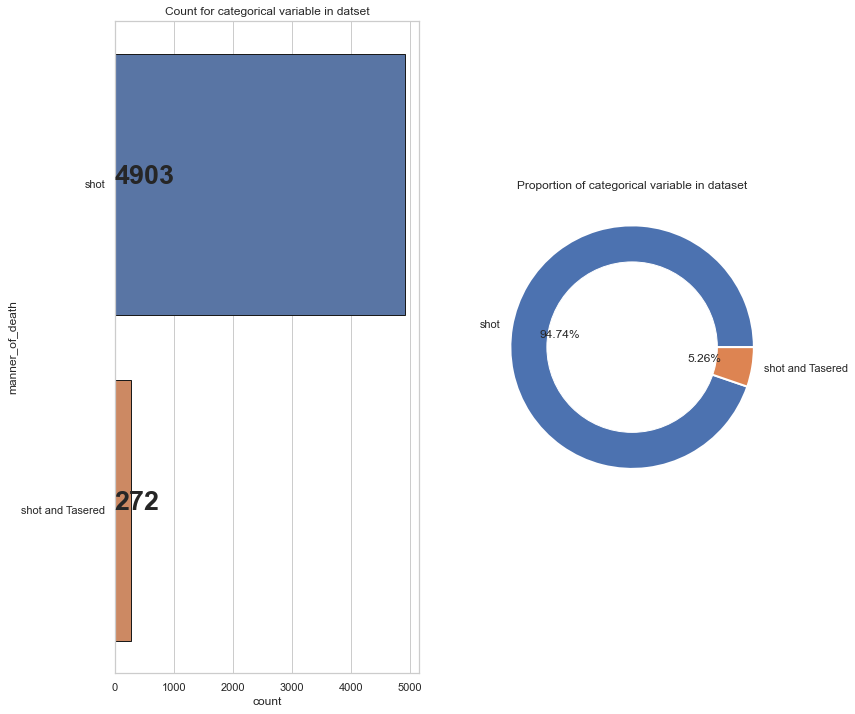

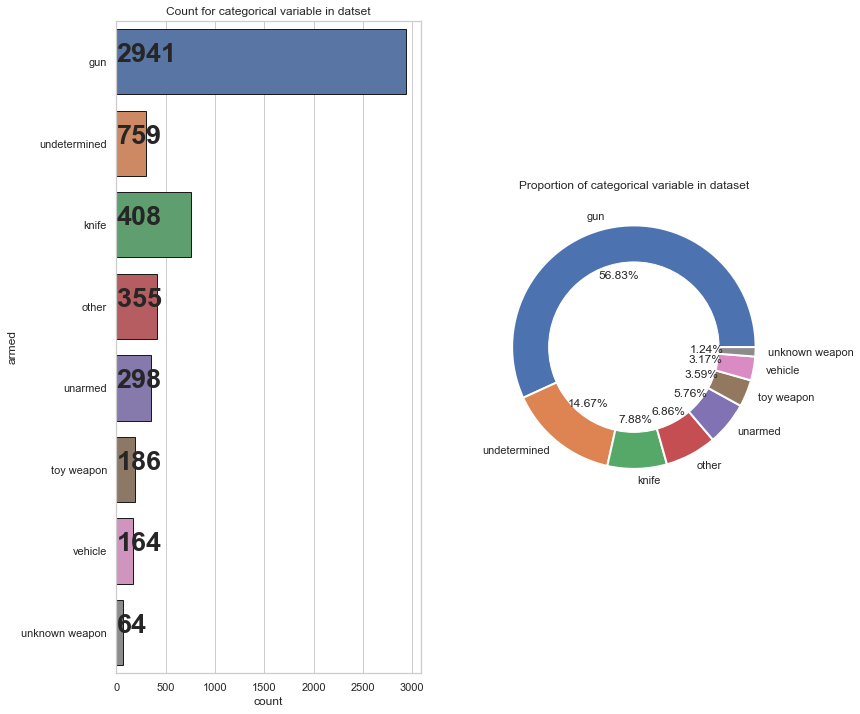

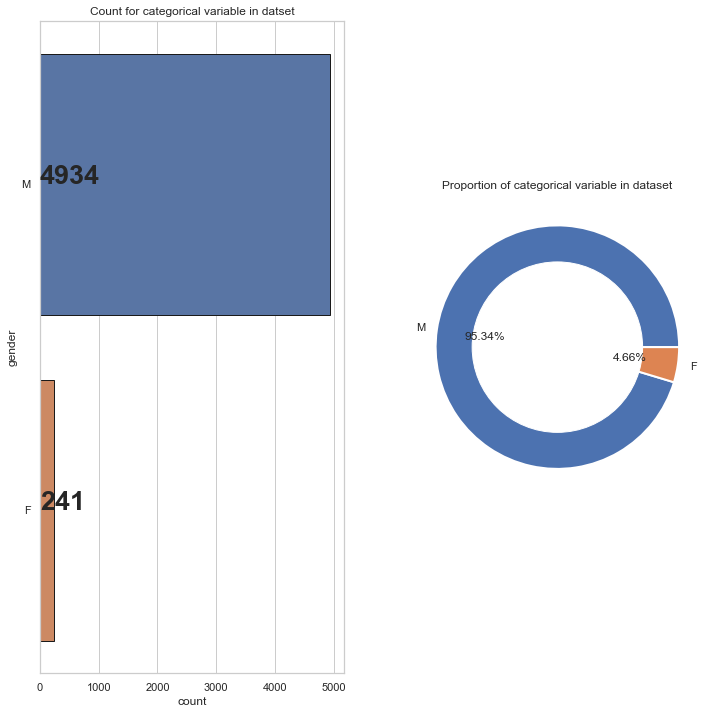

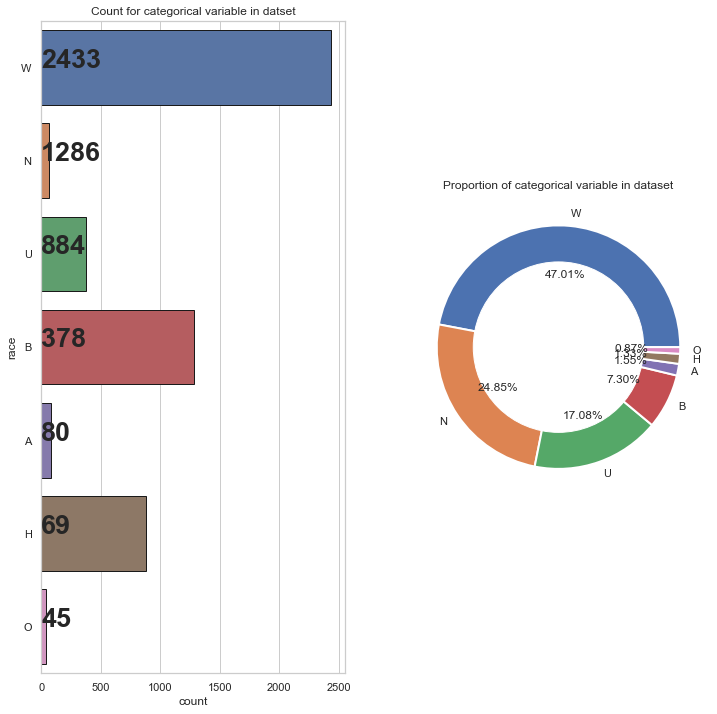

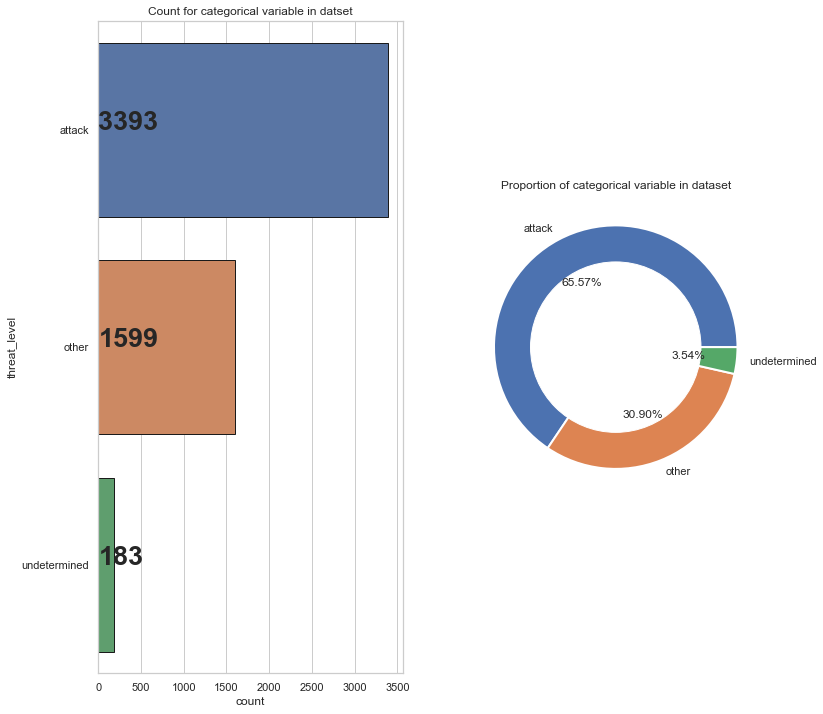

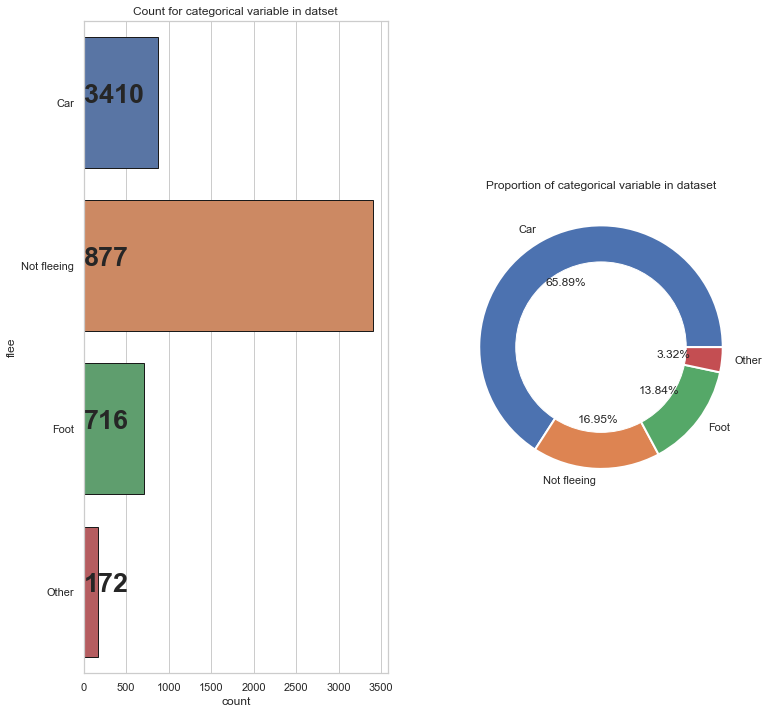

In [39]:

labels=["False","True"]
target_variable_name='signs_of_mental_illness'
df_processed,num_features,cat_features=EDA(data,labels,
                                         target_variable_name,
                                         data_summary_figsize=(6,6),
                                         corr_matrix_figsize=(6,6),
                                         corr_matrix_annot=True,
                                         pairplt=True)


### 6. Final Prep Stage for Modeling: Scaling Continuous Data, Creating Dummy DF and Test/Train Sets

###### Scaling lat, long, and age data.

In [40]:
mms = MinMaxScaler()

data[['longitude', 'latitude', 'age']] = mms.fit_transform(data[['longitude', 'latitude', 'age']])


###### Dropping data: Division, date, and 'is_geocoding_exact'
As our below models use cities, state and regions, Division is currently redundant and does not improve our scores. Date grows exponentially when transformed into dummies. 

In [41]:
final_data = data.drop(['Division', 'is_geocoding_exact', 'date'], axis=1)
final_data.head()

state Region manner_of_death         armed       age gender race  \
0    AK   West            shot           gun  0.317647      M    W   
1    AK   West            shot           gun  0.152941      M    N   
2    AK   West            shot           gun  0.317647      M    N   
3    AK   West            shot  undetermined  0.505882      M    W   
4    AK   West            shot         knife  0.505882      M    N   

              city  signs_of_mental_illness threat_level         flee  \
0        Anchorage                        0       attack          Car   
1        Fairbanks                        0       attack  Not fleeing   
2        Fairbanks                        0       attack          Car   
3  Kenai Peninsula                        0       attack  Not fleeing   
4          Spenard                        1        other  Not fleeing   

   body_camera  longitude  latitude  
0            0   0.091852  0.805166  
1            0   0.114932  0.875027  
2            0   0.117550  0.874621  
3            0   0.076052  0.787387  
4            0   0.091420  0.804857

###### Creating dummydf

In [42]:
dummydata = pd.get_dummies(final_data)
dummydata.head()

age  signs_of_mental_illness  body_camera  longitude  latitude  \
0  0.317647                        0            0   0.091852  0.805166   
1  0.152941                        0            0   0.114932  0.875027   
2  0.317647                        0            0   0.117550  0.874621   
3  0.505882                        0            0   0.076052  0.787387   
4  0.505882                        1            0   0.091420  0.804857   

   state_AK  state_AL  state_AR  state_AZ  state_CA  ...  city_Yuma  \
0         1         0         0         0         0  ...          0   
1         1         0         0         0         0  ...          0   
2         1         0         0         0         0  ...          0   
3         1         0         0         0         0  ...          0   
4         1         0         0         0         0  ...          0   

   city_Zanesville  city_Zion  threat_level_attack  threat_level_other  \
0                0          0                    1                   0   
1                0          0                    1                   0   
2                0          0                    1                   0   
3                0          0                    1                   0   
4                0          0                    0                   1   

   threat_level_undetermined  flee_Car  flee_Foot  flee_Not fleeing  \
0                          0         1          0                 0   
1                          0         0          0                 1   
2                          0         1          0                 0   
3                          0         0          0                 1   
4                          0         0          0                 1   

   flee_Other  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 2451 columns]

###### Creating target and feature variables

In [43]:
y = dummydata['signs_of_mental_illness']
X = dummydata.drop('signs_of_mental_illness', axis=1)

###### Creating train/test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4140, 2450) (4140,)
(1035, 2450) (1035,)


In [45]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

0    3140
1    1000
Name: signs_of_mental_illness, dtype: int64


0    791
1    244
Name: signs_of_mental_illness, dtype: int64


In [46]:
print('Train Group Shape: ', X_train.shape)
print('Test Group Shape: ', X_test.shape)

Train Group Shape:  (4140, 2450)
Test Group Shape:  (1035, 2450)


### 7. Random Forest Preliminary Analysis 

In [47]:
#Creating the model
rforest = RandomForestClassifier(random_state=42, n_estimators=100)
#Fitting the model
rforest.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(rforest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rforest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.762


###### Our first look at our classifier suggests our data is overfitting. 

In [48]:
#Per scikit's documentation, modifying our min_samples_leaf to address overfitting.
rforest1 = RandomForestClassifier(random_state=42, n_estimators=100, min_samples_leaf=5)
#Fitting the model
rforest1.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(rforest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rforest1.score(X_test, y_test)))

Accuracy on training set: 0.758
Accuracy on test set: 0.764


In [49]:
rf_pred1=rforest1.predict(X_test)

In [50]:
print("Accuracy:",metrics.accuracy_score(rf_pred1, y_test))

Accuracy: 0.7642512077294686


###### Setting 'min_samples_leaf' to 5 drastically improves our model. 

In [51]:
#Introducing max_depth limits. 
rforest2 = RandomForestClassifier(random_state=42, n_estimators=150, min_samples_leaf=5, max_depth=10)
#Fitting the model
rforest2.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(rforest2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rforest2.score(X_test, y_test)))

Accuracy on training set: 0.758
Accuracy on test set: 0.764


In [52]:
rf_pred2=rforest2.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(rf_pred2, y_test))

Accuracy: 0.7642512077294686


###### Let's take a look at our confusion matrix and classification report

Confusion matrix
[[791   0]
 [244   0]]


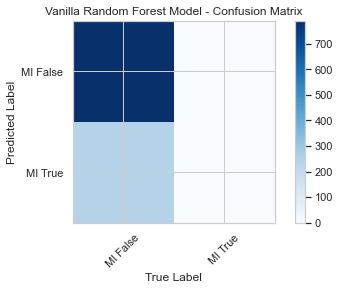

In [54]:
def plot_confusion_matrix(cmrf, names, title="Vanilla Random Forest Model - Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    
cm = confusion_matrix(y_test, rf_pred2)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["MI False","MI True"])

In [55]:
print('*RFC Scores*', '\n', classification_report(y_test, rf_pred2))

*RFC Scores* 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       791
           1       0.00      0.00      0.00       244

    accuracy                           0.76      1035
   macro avg       0.38      0.50      0.43      1035
weighted avg       0.58      0.76      0.66      1035



###### Our first look at our classifier suggests our data is highly imbalanced. Introducing SMOTE to oversample the minority class. 

In [56]:

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train1, y_train1 = smote.fit_sample(X_train, y_train) 
#X1, y1 = smote.fit_resample(X, y)

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train).value_counts()) 

Original class distribution: 

0    3931
1    1244
Name: signs_of_mental_illness, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    3140
1    1000
Name: signs_of_mental_illness, dtype: int64


In [57]:
#Creating the model
#Introducing 'min_samples_split'
rforest3 = RandomForestClassifier(random_state=42, n_estimators=150, min_samples_leaf=5, min_samples_split=3)
#Fitting the model
rforest3.fit(X_train1,y_train1)
print("Accuracy on training set: {:.3f}".format(rforest3.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(rforest3.score(X_test, y_test)))

Accuracy on training set: 0.721
Accuracy on test set: 0.636


In [58]:
rf_pred3=rforest3.predict(X_test)

Confusion matrix
[[483 308]
 [ 69 175]]


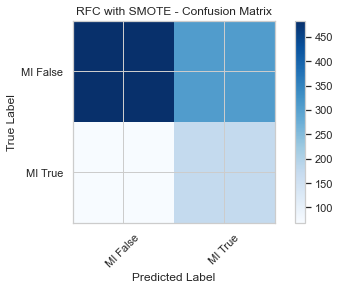

In [59]:
def plot_confusion_matrix(cmrf, names, title="RFC with SMOTE - Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
cm = confusion_matrix(y_test, rf_pred3)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["MI False","MI True"])

In [60]:
print('*RFC Scores*', '\n', classification_report(y_test, rf_pred2))
print('------------------------------------------------------------------------')
print('*RFC Scores with SMOTE*', '\n', classification_report(y_test, rf_pred3))

*RFC Scores* 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       791
           1       0.00      0.00      0.00       244

    accuracy                           0.76      1035
   macro avg       0.38      0.50      0.43      1035
weighted avg       0.58      0.76      0.66      1035

------------------------------------------------------------------------
*RFC Scores with SMOTE* 
               precision    recall  f1-score   support

           0       0.88      0.61      0.72       791
           1       0.36      0.72      0.48       244

    accuracy                           0.64      1035
   macro avg       0.62      0.66      0.60      1035
weighted avg       0.75      0.64      0.66      1035



#### Our scores have improved, but our test/train scores have dropped. Introducing k-fold Cross Validation and AUC scores.

In [61]:
kfold = KFold(n_splits=8, random_state=42) 
rfc_cv_score = cross_val_score(rforest3, X, y, cv=kfold, scoring='roc_auc')

In [62]:
print('RFC with SMOTE')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_pred3))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_pred3))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

RFC with SMOTE
=== Confusion Matrix ===
[[483 308]
 [ 69 175]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       791
           1       0.36      0.72      0.48       244

    accuracy                           0.64      1035
   macro avg       0.62      0.66      0.60      1035
weighted avg       0.75      0.64      0.66      1035



=== All AUC Scores ===
[0.71 0.72 0.74 0.69 0.69 0.7  0.7  0.71]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7089464071410321


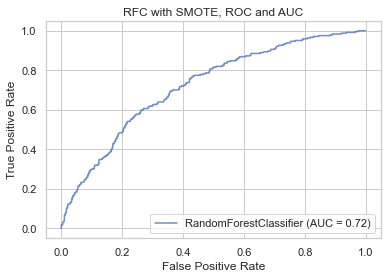

In [63]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rforest3, X_test, y_test, ax=ax, alpha=0.8)
plt.title('RFC with SMOTE, ROC and AUC')
plt.show()


###### We have a decent mean AUC score, but before we settle on our model, let's examine: 
     Feature and Hyperparameter Tuning

### 8. Random Forest Feature Analysis: feature importance and permutation importance

###### Identifying feature importance

In [64]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [65]:
base_imp = imp_df(X_train.columns, rforest3.feature_importances_)
base_imp

feature  feature_importance
0                      flee_Car            0.119596
1              flee_Not fleeing            0.093117
2                     flee_Foot            0.075531
3                        race_B            0.066264
4                        race_W            0.062984
...                         ...                 ...
2445               city_Grafton            0.000000
2446                city_Graham            0.000000
2447  city_Grand Canyon Caverns            0.000000
2448           city_Grand Forks            0.000000
2449                city_Layton            0.000000

[2450 rows x 2 columns]

###### Identifying permutation importance

In [67]:
perm = PermutationImportance(rforest3, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

###### Using feature importance to fit our model. 

In [68]:
#Transforming our variables for our RFC model. 
rffc = RandomForestClassifier()
rffc = rffc.fit(X, y)
rffc.feature_importances_  
model = SelectFromModel(rffc, threshold=0.025, prefit=True)
X_new1 = model.transform(X)
X_new1.shape               

(5175, 3)

###### Permutation Importance code to compare PI/FI model fit.

In [69]:
#rffc = RandomForestClassifier()
#rffc = rffc.fit(X, y)
#perm = PermutationImportance(rffc)
#perm.fit(X, y)
#sel = SelectFromModel(perm, threshold=0.025, prefit=True)
#X_new1 = sel.transform(X)
#X_new1.shape

In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new1, y, test_size=0.2, random_state=42)
print(X_train2.shape, y_train.shape)
print(X_test2.shape, y_test.shape)

(4140, 3) (4140,)
(1035, 3) (1035,)


###### Applying SMOTE to our selected features. 

In [71]:
X_train2, y_train2 = smote.fit_sample(X_train2, y_train2) 

###### Using the same parameters from our current best model.

In [72]:
rforest4 = RandomForestClassifier(random_state=42, n_estimators=150, min_samples_leaf=5, min_samples_split=5)
#Fitting the model
rforest4.fit(X_train2,y_train2)
print("Accuracy on training set: {:.3f}".format(rforest4.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(rforest4.score(X_test2, y_test2)))

Accuracy on training set: 0.914
Accuracy on test set: 0.638


###### Test/train scores are much worse than our SMOTE model. Need to analyze fit. 

In [73]:
rf_pred4=rforest4.predict(X_test2)

###### Checking our metrics. 

In [74]:
rfc_cv_score1 = cross_val_score(rforest4, X, y, cv=kfold, scoring='roc_auc')
print('Feature Importance and SMOTE RFC Scores')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test2, rf_pred4))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test2, rf_pred4))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score1)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score1.mean())

Feature Importance and SMOTE RFC Scores
=== Confusion Matrix ===
[[569 222]
 [153  91]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       791
           1       0.29      0.37      0.33       244

    accuracy                           0.64      1035
   macro avg       0.54      0.55      0.54      1035
weighted avg       0.67      0.64      0.65      1035



=== All AUC Scores ===
[0.71 0.72 0.74 0.69 0.69 0.7  0.7  0.71]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7089464071410321


In [75]:
print('*RFC Scores, Feature Importance and SMOTE*', '\n', classification_report(y_test2, rf_pred4))
print('------------------------------------------------------------------------')
print('*RFC Scores with SMOTE*', '\n', classification_report(y_test, rf_pred3))

*RFC Scores, Feature Importance and SMOTE* 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       791
           1       0.29      0.37      0.33       244

    accuracy                           0.64      1035
   macro avg       0.54      0.55      0.54      1035
weighted avg       0.67      0.64      0.65      1035

------------------------------------------------------------------------
*RFC Scores with SMOTE* 
               precision    recall  f1-score   support

           0       0.88      0.61      0.72       791
           1       0.36      0.72      0.48       244

    accuracy                           0.64      1035
   macro avg       0.62      0.66      0.60      1035
weighted avg       0.75      0.64      0.66      1035



###### Mean AUC has stayed constant, but our recall score has dropped by almost 40 points using feature importance. Before settling on a model, we'll implement hyperparameter tuning via gridsearch. 

### 9. Random Forest Classifier Analysis, SMOTE and Gridsearch

In [76]:
print('Parameters currently in use:\n')
print(rforest3.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


##### Setting parameter grid for tuning:
    Based on our current parameters and our best parameters before, we'll limit our search to 5 specific parameters, 3 options each. 

In [77]:
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

###### We'll use our SMOTE  model as our recall was higher than our feature importance fit model. 

In [78]:
rf_grid_search = GridSearchCV(rforest3, rf_param_grid, cv=3)
rf_grid_search.fit(X_train1, y_train1)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 78.73%

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [79]:
#Checking Train/Test Scores
mean_rf_cv_score = np.mean(cross_val_score(rforest3, X, y, cv=kfold, scoring='roc_auc'))
rf_gs_training_score = mean_rf_cv_score

rf_gs_testing_score = rf_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {rf_gs_training_score :.2%}")

print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 70.89%
Mean Test Score: 65.60%
Best Parameter Combination Found During Grid Search:


{'class_weight': 'balanced',
 'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [80]:
rf_pred3a = rf_grid_search.predict(X_test)
accuracy_score(y_test, rf_pred3a)

0.6560386473429952

In [87]:
print('*RFC Scores, Feature Importance and SMOTE*', '\n', classification_report(y_test2, rf_pred4))
print('------------------------------------------------------------------------')
print('*RFC Scores, Hyperparameter Tuning with SMOTE*', '\n', classification_report(y_test, rf_pred3a))
print('------------------------------------------------------------------------')
print('*RFC Scores with SMOTE*', '\n', classification_report(y_test, rf_pred3))

*RFC Scores, Feature Importance and SMOTE* 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       791
           1       0.29      0.37      0.33       244

    accuracy                           0.64      1035
   macro avg       0.54      0.55      0.54      1035
weighted avg       0.67      0.64      0.65      1035

------------------------------------------------------------------------
*RFC Scores, Hyperparameter Tuning with SMOTE* 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       791
           1       0.35      0.54      0.43       244

    accuracy                           0.66      1035
   macro avg       0.59      0.62      0.59      1035
weighted avg       0.72      0.66      0.68      1035

------------------------------------------------------------------------
*RFC Scores with SMOTE* 
               precision    recall  f1-score   support

           0       0.88  

In [88]:
print('RFC Scores, Hyperparameter Tuning with SMOTE')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test2, rf_pred3a))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test2, rf_pred3a))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

RFC Scores, Hyperparameter Tuning with SMOTE
=== Confusion Matrix ===
[[547 244]
 [112 132]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       791
           1       0.35      0.54      0.43       244

    accuracy                           0.66      1035
   macro avg       0.59      0.62      0.59      1035
weighted avg       0.72      0.66      0.68      1035



=== All AUC Scores ===
[0.71 0.72 0.74 0.69 0.69 0.7  0.7  0.71]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7089464071410321


### 10. Best Performing Model and Conclusion

###### As our goal is to minimize false negatives (type II errors), our best performing model is our Random Forest Classifier utilizing SMOTE. 
    - Our recall score using SMOTE is twenty points higher than our next best performing model (SMOTE and feature importance)
    - Our SMOTE model is tied with the rest of the models with a 71% mean AUC score. 

Confusion matrix
[[483 308]
 [ 69 175]]


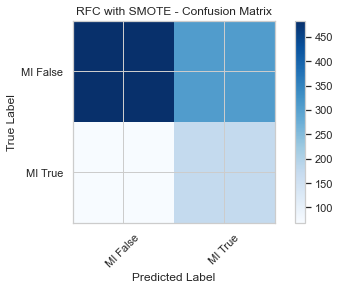

In [83]:
cm = confusion_matrix(y_test, rf_pred3)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["MI False","MI True"])

In [84]:
print('RFC with SMOTE')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_pred3))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_pred3))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

RFC with SMOTE
=== Confusion Matrix ===
[[483 308]
 [ 69 175]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       791
           1       0.36      0.72      0.48       244

    accuracy                           0.64      1035
   macro avg       0.62      0.66      0.60      1035
weighted avg       0.75      0.64      0.66      1035



=== All AUC Scores ===
[0.71 0.72 0.74 0.69 0.69 0.7  0.7  0.71]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7089464071410321


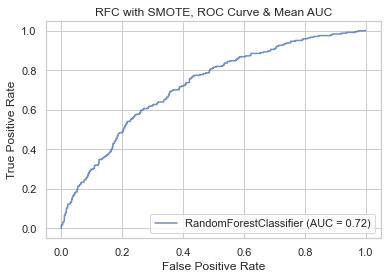

In [85]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rforest3, X_test, y_test, ax=ax, alpha=0.8)
plt.title('RFC with SMOTE, ROC Curve & Mean AUC')
plt.show()

#### Future Steps 
1. Expand timeframe, region information.
    - While adding in regions and divisions has eased project visualization, the added data doesn't address the lack of comprehensive mental health/mental illness data across disparate regions. We need more data on casualties suffering from mental illness. 
    - Expanding the collection timeframe may show trends/spikes that a 5 year period cannot. 
2. Combine local/state/federal databases indicating a mental illness presence, regardless of fatalities. 
    - Are there commonalities across other types of police response aside from fatal shootings? Would we see the same indicators in arrests or non-lethal police responses? 
3. Are there other variables that may expand insight into mental illness presence (e.g., arrest record, probation, etc.).
4. Is there data available for localities that utilize crisis response teams? If so, can we track fatalities and injuries pre/post introduction of crisis response teams? 